In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pylab as plt
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
tf.random.set_random_seed(777)

In [4]:
#parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 15
num_iterations = int(mnist.train.num_examples / batch_size)
nb_classes = 10

# placeholders for input
X = tf.placeholder(tf.float32, shape=[None, 28*28])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

# Weights and biases for NN layers
W1 = tf.get_variable("W1", shape=[28*28, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# compute accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

# Launch Session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Training the model
for epoch in range(num_epochs):
    avg_cost = 0
    
    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / num_iterations
        
    print("Epoch:", "%04d" % (epoch + 1), "cost:", "{:.9f}".format(avg_cost))
    
print("Learning finished!")

Instructions for updating:
Colocations handled automatically by placer.
Epoch: 0001 cost: 0.306550601
Epoch: 0002 cost: 0.108541188
Epoch: 0003 cost: 0.073356323
Epoch: 0004 cost: 0.053835502
Epoch: 0005 cost: 0.044625511
Epoch: 0006 cost: 0.035822857
Epoch: 0007 cost: 0.027286774
Epoch: 0008 cost: 0.029256745
Epoch: 0009 cost: 0.022485598
Epoch: 0010 cost: 0.020798895
Epoch: 0011 cost: 0.018337881
Epoch: 0012 cost: 0.015986507
Epoch: 0013 cost: 0.016827064
Epoch: 0014 cost: 0.015173429
Epoch: 0015 cost: 0.016384354
Learning finished!


In [5]:
print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9803


In [7]:
# Get one and predict
idx = np.random.choice(mnist.test.num_examples, 1)[0]
print("Label:", sess.run(tf.argmax(mnist.test.labels[idx:idx+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[idx:idx+1]}))

Label: [4]
Prediction: [4]


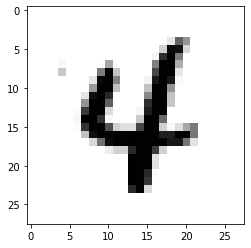

In [8]:
plt.imshow(mnist.test.images[idx:idx+1].reshape(28, 28), cmap="Greys", interpolation='nearest')
plt.show()